# Leaky Aquifer Test
**This example is taken from AQTESOLV examples.**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ttim import *

Set basic parameters:

In [2]:
Q = 24464.06 #constant discharge in m^3/d
b1 = 6.096 #overlying aquitard thickness in m
b2 = 15.24 #aquifer thickness in m
zt = -b1 #top boundary of aquifer
zb = -b1 - b2 #bottom boundary of aquifer
rw = 0.1524 #well radius in m

Load dataset of observation wells:

In [3]:
#data of observation well 1
data1 = np.loadtxt('data/texas40.txt')
t1 = data1[:, 0]
h1 = data1[:, 1]
r1 = 12.191 #distance between obs1 to pumping well in m
#data of observation well 2
data2 = np.loadtxt('data/texas80.txt')
t2 = data2[:, 0]
h2 = data2[:, 1]
r2 = 24.383 #distance between obs2 to pumping well in m
#data of observation well 3
data3 = np.loadtxt('data/texas160.txt')
t3 = data3[:, 0]
h3 = data3[:, 1]
r3 = 48.766 #distance between obs3 to pumping well in m

Create conceptual model:

In [4]:
ml_0 = ModelMaq(kaq=10, z=[0, zt, zb], Sll=0, Saq=0.001, c=10, tmin=0.001, \
                tmax=1, topboundary='semi')
w_0 = Well(ml_0, xw=0, yw=0, rw=rw, tsandQ=[(0, Q)], layers=0)
ml_0.solve()

self.neq  1
solution complete


Calibrate with three datasets simultaneously：

In [5]:
#unknown parameters: kaq, Saq, c, Sll
ca_0 = Calibrate(ml_0)
ca_0.set_parameter(name='kaq0', initial=10)
ca_0.set_parameter(name='Saq0', initial=1e-4)
ca_0.set_parameter_by_reference(name='Sll0_1', parameter=ml_0.aq.Sll, \
                                initial=1e-4, pmin=0)
ca_0.set_parameter(name='c0', initial=100)
ca_0.series(name='obs1', x=r1, y=0, t=t1, h=h1, layer=0)
ca_0.series(name='obs2', x=r2, y=0, t=t2, h=h2, layer=0)
ca_0.series(name='obs3', x=r3, y=0, t=t3, h=h3, layer=0)
ca_0.fit(report=True)

...............................................................................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 124
    # data points      = 78
    # variables        = 4
    chi-square         = 0.28305607
    reduced chi-square = 0.00382508
    Akaike info crit   = -430.267891
    Bayesian info crit = -420.841055
[[Variables]]
    kaq0:    224.580728 +/- 2.48429386 (1.11%) (init = 10)
    Saq0:    2.1316e-04 +/- 7.0488e-05 (33.07%) (init = 0.0001)
    Sll0_1:  1.7482e-06 +/- 5.3118e-04 (30383.82%) (init = 0.0001)
    c0:      43.8231417 +/- 3.15115666 (7.19%) (init = 100)
[[Correlations]] (unreported correlations are < 0.100)
    C(Saq0, Sll0_1) = -0.994
    C(kaq0, c0)     =  0.890


In [6]:
display(ca_0.parameters)
print('RMSE:', ca_0.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,224.581,2.484294,1.10619,-inf,inf,10,[224.58072771909585]
Saq0,0.000213159,0.000070,33.0681,-inf,inf,0.0001,[0.00021315894214556682]
Sll0_1,1.74823e-06,0.000531,30383.8,0.0,inf,0.0001,[1.7482336305274515e-06]
c0,43.8231,3.151157,7.19062,-inf,inf,100,[43.823141666697225]


RMSE: 0.06024055063827496


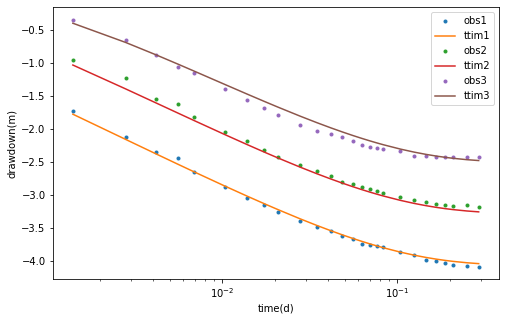

In [7]:
hm1_0 = ml_0.head(r1, 0, t1)
hm2_0 = ml_0.head(r2, 0, t2)
hm3_0 = ml_0.head(r3, 0, t3)
plt.figure(figsize = (8, 5))
plt.semilogx(t1, h1, '.', label = 'obs1')
plt.semilogx(t1, hm1_0[0], label = 'ttim1')
plt.semilogx(t2, h2, '.', label = 'obs2')
plt.semilogx(t2, hm2_0[0], label = 'ttim2')
plt.semilogx(t3, h3, '.', label = 'obs3')
plt.semilogx(t3, hm3_0[0], label = 'ttim3')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.legend();

Try adding res & rc:

In [8]:
ml_1 = ModelMaq(kaq=10, z=[0, zt, zb], Sll=0, Saq=0.001, c=10, tmin=0.001, \
                tmax=1, topboundary='semi')
w_1 = Well(ml_1, xw=0, yw=0, rw=rw, res=0, rc=None, tsandQ=[(0, Q)], layers=0)
ml_1.solve()

self.neq  1
solution complete


Calibrate with three datasets simultaneously:

When adding both res and rc into calibration and set the minimum limitations as zero, the optimized res value is about 2.8e-08, which means adding res in the conceptual model has no effect on improving the performance. Thus, res is removed from the calibration.

In [9]:
#unknown parameters: kaq, Saq, c, Sll
ca_1 = Calibrate(ml_1)
ca_1.set_parameter(name='kaq0', initial=10)
ca_1.set_parameter(name='Saq0', initial=1e-4)
ca_1.set_parameter_by_reference(name='Sll0_1', parameter=ml_1.aq.Sll, \
                                initial=1e-4, pmin=0)
ca_1.set_parameter(name='c0', initial=100)
ca_1.set_parameter_by_reference(name='rc', parameter=w_1.rc, initial=0)
#ca_1.set_parameter_by_reference(name='res', parameter=w_1.res, initial=0)
ca_1.series(name='obs1', x=r1, y=0, t=t1, h=h1, layer=0)
ca_1.series(name='obs2', x=r2, y=0, t=t2, h=h2, layer=0)
ca_1.series(name='obs3', x=r3, y=0, t=t3, h=h3, layer=0)
ca_1.fit(report=True)

..........................................................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 103
    # data points      = 78
    # variables        = 5
    chi-square         = 0.22816771
    reduced chi-square = 0.00312559
    Akaike info crit   = -445.081887
    Bayesian info crit = -433.298343
[[Variables]]
    kaq0:    227.449026 +/- 2.47990575 (1.09%) (init = 10)
    Saq0:    1.8696e-04 +/- 7.6337e-05 (40.83%) (init = 0.0001)
    Sll0_1:  3.6586e-05 +/- 5.5214e-04 (1509.18%) (init = 0.0001)
    c0:      45.1244552 +/- 3.09729402 (6.86%) (init = 100)
    rc:      0.59315129 +/- 0.16151182 (27.23%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(Saq0, Sll0_1) = -0.994
    C(Saq0, rc)     = -0.944
    C(Sll0_1, rc)   =  0.924
    C(kaq0, c0)     =  0.893
    C(Sll0_1, c0)   = -0.316
    C(Saq0, c0)     =  0.259
    C(kaq0, Sll0_1) = -0.256
    C(c0, rc)   

In [10]:
display(ca_1.parameters)
print('RMSE:', ca_1.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,227.449,2.479906,1.09031,-inf,inf,10,[227.44902565463403]
Saq0,0.00018696,0.000076,40.8307,-inf,inf,0.0001,[0.00018695990742006029]
Sll0_1,3.65855e-05,0.000552,1509.18,0.0,inf,0.0001,[3.6585542772193946e-05]
c0,45.1245,3.097294,6.86389,-inf,inf,100,[45.12445521148821]
rc,0.593151,0.161512,27.2294,-inf,inf,0,[0.5931512890144064]


RMSE: 0.054085368302354817


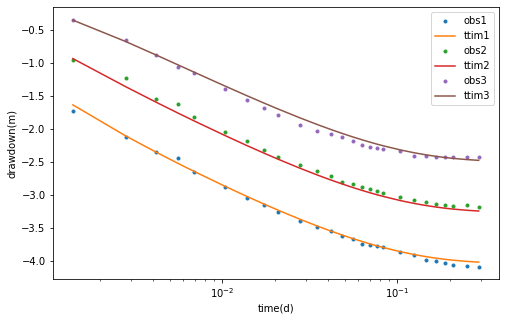

In [11]:
hm1_1 = ml_1.head(r1, 0, t1)
hm2_1 = ml_1.head(r2, 0, t2)
hm3_1 = ml_1.head(r3, 0, t3)
plt.figure(figsize = (8, 5))
plt.semilogx(t1, h1, '.', label = 'obs1')
plt.semilogx(t1, hm1_1[0], label = 'ttim1')
plt.semilogx(t2, h2, '.', label = 'obs2')
plt.semilogx(t2, hm2_1[0], label = 'ttim2')
plt.semilogx(t3, h3, '.', label = 'obs3')
plt.semilogx(t3, hm3_1[0], label = 'ttim3')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.legend();

## Summary of values simulated by AQTESOLV

In [12]:
t = pd.DataFrame(columns=['k [m/d]', 'Ss [1/m]', 'Sll [1/m]', 'c [d]', 'rc'], \
                index=['AQTESOLV', 'ttim', 'ttim-rc'])
t.loc['AQTESOLV'] = [224.726, 2.125e-4, '-', 43.964, '-']
t.loc['ttim'] = np.append(ca_0.parameters['optimal'].values, '-')
t.loc['ttim-rc'] = ca_1.parameters['optimal'].values
t['RMSE'] = [0.059627, ca_0.rmse(), ca_1.rmse()]
t

,k [m/d],Ss [1/m],Sll [1/m],c [d],rc,RMSE
AQTESOLV,224.726,0.0002125,-,43.964,-,0.059627
ttim,224.581,0.000213159,1.74823e-06,43.8231,-,0.060241
ttim-rc,227.449,0.00018696,3.65855e-05,45.1245,0.593151,0.054085
